In [210]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression

%matplotlib inline

In [2]:
raw = pd.read_excel('연소득과주택소유.xlsx')

In [3]:
data = raw.copy()

In [4]:
data

,Record,Income,House
0,1,12,0
1,2,18,0
2,3,21,0
3,4,22,0
4,5,22,0
...,...,...,...
95,96,93,1
96,97,93,1
97,98,94,1
98,99,95,1


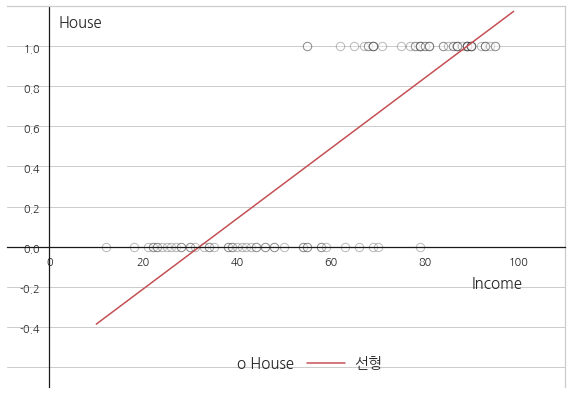

In [253]:
model = ols('House ~ Income', data=data).fit()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(10, 100), np.arange(10, 100) * model.params[1] + model.params[0], color='r')
ax.scatter(data.Income, data.House, marker='o', c='w', s=70, linewidths=1, edgecolor='k', alpha=0.3)
plt.xlim(-9, 110)
plt.ylim(-0.7, 1.2)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(None, axis='x')

ax.spines['left'].set_color('k')
ax.spines['left'].set_position('zero')

ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_position('zero')

ax.set_yticks([round(-0.6 + (i*0.2),2) for i in range(0, 9)])
ax.set_yticklabels(['']+[round(-0.4 + (i*0.2),2) for i in range(0, 8)])

plt.text(2, 1.1, 'House', fontsize=15)
plt.text(90, -0.2, 'Income', fontsize=15)
plt.text(40, -0.6, 'o House', fontsize=15)
plt.text(65, -0.6, '선형', fontsize=15)
plt.plot([55, 63], [-0.58, -0.58], color='r')
plt.show()

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  House   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           2.03e-28
Time:                        21:12:04   Log-Likelihood:                -9.7372
No. Observations:                 100   AIC:                             23.47
Df Residuals:                      98   BIC:                             28.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5625      0.075     -7.520      0.0

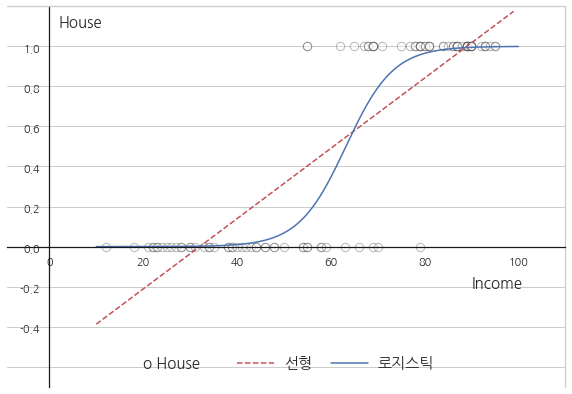

In [242]:
logit_model_1 = LogisticRegression()
logit_model_1.fit(np.reshape(data.Income.values, (-1, 1)), data.House)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(10, 100), np.arange(10, 100) * model.params[1] + model.params[0], color='r', linestyle='--')
ax.scatter(data.Income, data.House, marker='o', c='w', s=70, linewidths=1, edgecolor='k', alpha=0.3)
xx = np.linspace(10, 100, 1000)
ax.plot(xx, 1/(1+np.exp(-(xx*logit_model_1.coef_ + logit_model_1.intercept_)))[0], color='b')

plt.xlim(-9, 110)
plt.ylim(-0.7, 1.2)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(None, axis='x')

ax.spines['left'].set_color('k')
ax.spines['left'].set_position('zero')

ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_position('zero')

ax.set_yticks([round(-0.6 + (i*0.2),2) for i in range(0, 9)])
ax.set_yticklabels(['']+[round(-0.4 + (i*0.2),2) for i in range(0, 8)])

plt.text(2, 1.1, 'House', fontsize=15)
plt.text(90, -0.2, 'Income', fontsize=15)

plt.text(20, -0.6, 'o House', fontsize=15)

plt.plot([40, 48], [-0.58, -0.58], color='r', linestyle='--')
plt.text(50, -0.6, '선형', fontsize=15)

plt.plot([60, 68], [-0.58, -0.58], color='b')
plt.text(70, -0.6, '로지스틱', fontsize=15)
plt.show()

In [243]:
logit_model_1.coef_

array([[0.19795723]])

In [244]:
logit_model_1.intercept_

array([-12.51673662])

In [219]:
logit_model_2 = logit('House ~ Income', data=data).fit()
print(logit_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.179405
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  House   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Jan 2022   Pseudo R-squ.:                  0.7405
Time:                        23:12:36   Log-Likelihood:                -17.941
converged:                       True   LL-Null:                       -69.135
Covariance Type:            nonrobust   LLR p-value:                 4.564e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5421      2.920     -4.295      0.000     -18.266      -6.819
Income         0.1983      0.

In [255]:
logit_model_1.predict_proba(np.reshape(data.Income.values, (-1, 1)))

array([[9.99960582e-01, 3.94179503e-05],
       [9.99870734e-01, 1.29266329e-04],
       [9.99765925e-01, 2.34075031e-04],
       [9.99714698e-01, 2.85301838e-04],
       [9.99714698e-01, 2.85301838e-04],
       [9.99652264e-01, 3.47735621e-04],
       [9.99652264e-01, 3.47735621e-04],
       [9.99576174e-01, 4.23826254e-04],
       [9.99483442e-01, 5.16558244e-04],
       [9.99370433e-01, 6.29566954e-04],
       [9.99232720e-01, 7.67279876e-04],
       [9.99064912e-01, 9.35088253e-04],
       [9.99064912e-01, 9.35088253e-04],
       [9.98611331e-01, 1.38866935e-03],
       [9.98611331e-01, 1.38866935e-03],
       [9.98307851e-01, 1.69214892e-03],
       [9.97487968e-01, 2.51203235e-03],
       [9.96939741e-01, 3.06025915e-03],
       [9.96939741e-01, 3.06025915e-03],
       [9.96272316e-01, 3.72768403e-03],
       [9.93269562e-01, 6.73043846e-03],
       [9.93269562e-01, 6.73043846e-03],
       [9.91808269e-01, 8.19173113e-03],
       [9.91808269e-01, 8.19173113e-03],
       [9.900328

In [254]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(data.House, )
plt.plot(fpr, tpr)
plt.show()

ValueError: y should be a 1d array, got an array of shape (100, 2) instead.

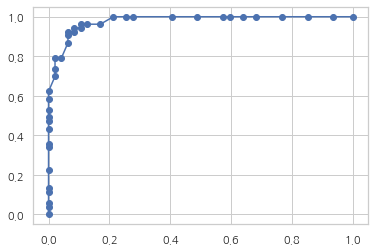

In [238]:
fpr, tpr, thresholds = roc_curve(data.House, logit_model_2.predict(data.Income))
plt.plot(fpr, tpr, 'o-')
plt.show()

91.48936170212765